# This notebook will create a Zarr for population with HIV data 
## Based on data captured from https://aidsinfo.unaids.org/

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import xarray as xr
#import load_covid_data
import glob 

import seaborn as sns
sns.set_context('talk')
plt.style.use('seaborn-whitegrid')

In [4]:
DATA_PATH = "/Users/nadeem/Downloads/COVID_HIV/"

In [5]:
d = {}
for filename in glob.glob(DATA_PATH+'*HIV_Population*xls'):
    print(filename)
    Outfile = filename.split('/')[-1].split('_ ')[-1].split('.')[0]
#    if "test" in filename:
    d[Outfile] = pd.read_excel(filename)

/Users/nadeem/Downloads/COVID_HIV/People living with HIV_Number of people living with HIV_Population_ Women aged 50 and over.xls
/Users/nadeem/Downloads/COVID_HIV/People living with HIV_Number of people living with HIV_Population_ Male adults (15+).xls
/Users/nadeem/Downloads/COVID_HIV/People living with HIV_Number of people living with HIV_Population_ Female adults (15+).xls
/Users/nadeem/Downloads/COVID_HIV/People living with HIV_Number of people living with HIV_Population_ Female adolescents (10-19).xls
/Users/nadeem/Downloads/COVID_HIV/People living with HIV_Number of people living with HIV_Population_ Men aged 50 and over.xls
/Users/nadeem/Downloads/COVID_HIV/People living with HIV_Number of people living with HIV_Population_ All ages.xls
/Users/nadeem/Downloads/COVID_HIV/People living with HIV_Number of people living with HIV_Population_ Adolescents (10-19).xls
/Users/nadeem/Downloads/COVID_HIV/People living with HIV_Number of people living with HIV_Population_ Male adolescents (

In [6]:
for Mykey in d.keys():
    d[Mykey] = d[Mykey].T
 
    d[Mykey].columns = d[Mykey].iloc[0]
    d[Mykey].drop(d[Mykey].index[0],inplace=True)

    print(f"Done with {Mykey}")

Done with Women aged 50 and over
Done with Male adults (15+)
Done with Female adults (15+)
Done with Female adolescents (10-19)
Done with Men aged 50 and over
Done with All ages
Done with Adolescents (10-19)
Done with Male adolescents (10-19)
Done with Young people (15-24)
Done with Adults (15+)
Done with Children (0-14)
Done with People aged 50 and over
Done with Young women (15-24)
Done with Young men (15-24)


In [7]:
d['Women aged 50 and over'].head()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Global
1990,<100 [<100 - <100],... [... - ...],<100 [<100 - <100],<500 [<200 - <1000],<100 [<100 - <100],<500 [<500 - <1000],<100 [<100 - <100],<100 [<100 - <200],... [... - ...],... [... - ...],...,20 000 [9000 - 36 000],... [... - ...],<100 [<100 - <200],<200 [<100 - <200],... [... - ...],<100 [<100 - <100],<100 [<100 - <100],8700 [4600 - 14 000],23 000 [11 000 - 35 000],230 000 [130 000 - 370 000]
1991,<100 [<100 - <100],... [... - ...],<100 [<100 - <100],<1000 [<500 - 1200],<100 [<100 - <100],<1000 [<500 - <1000],<100 [<100 - <100],<100 [<100 - <200],... [... - ...],... [... - ...],...,25 000 [11 000 - 45 000],... [... - ...],<100 [<100 - <200],<200 [<100 - <200],... [... - ...],<100 [<100 - <100],<100 [<100 - <100],11 000 [5800 - 18 000],30 000 [14 000 - 46 000],290 000 [160 000 - 460 000]
1992,<100 [<100 - <100],... [... - ...],<100 [<100 - <100],<1000 [<500 - 1500],<100 [<100 - <100],<1000 [<500 - 1200],<100 [<100 - <100],<100 [<100 - <200],... [... - ...],... [... - ...],...,30 000 [14 000 - 54 000],... [... - ...],<100 [<100 - <200],<200 [<100 - <500],... [... - ...],<100 [<100 - <100],<100 [<100 - <100],14 000 [7100 - 22 000],37 000 [18 000 - 58 000],350 000 [200 000 - 550 000]
1993,<100 [<100 - <100],... [... - ...],<100 [<100 - <100],<1000 [<500 - 1900],<100 [<100 - <100],<1000 [<500 - 1400],<100 [<100 - <100],<200 [<100 - <200],... [... - ...],... [... - ...],...,35 000 [16 000 - 64 000],... [... - ...],<100 [<100 - <500],<200 [<100 - <500],... [... - ...],<100 [<100 - <100],<100 [<100 - <100],16 000 [8400 - 26 000],45 000 [21 000 - 69 000],410 000 [230 000 - 660 000]
1994,<100 [<100 - <100],... [... - ...],<100 [<100 - <100],1200 [<500 - 2400],<100 [<100 - <100],1000 [<1000 - 1700],<100 [<100 - <100],<200 [<100 - <200],... [... - ...],... [... - ...],...,40 000 [18 000 - 72 000],... [... - ...],<200 [<100 - <500],<200 [<100 - <500],... [... - ...],<100 [<100 - <200],<100 [<100 - <100],18 000 [9700 - 30 000],51 000 [24 000 - 78 000],480 000 [270 000 - 760 000]


In [8]:
for Mykey in d.keys():
    print(Mykey)

Women aged 50 and over
Male adults (15+)
Female adults (15+)
Female adolescents (10-19)
Men aged 50 and over
All ages
Adolescents (10-19)
Male adolescents (10-19)
Young people (15-24)
Adults (15+)
Children (0-14)
People aged 50 and over
Young women (15-24)
Young men (15-24)


In [9]:
tmp0 = xr.Dataset({'Female50plus':(('time', 'country'), d['Women aged 50 and over'].values),
                   'Male15plus':(('time', 'country'), d['Male adults (15+)'].values),
                   'Female15plus':(('time', 'country'), d['Female adults (15+)'].values),
                   'Female10_19':(('time', 'country'), d['Female adolescents (10-19)'].values),
                   'Male50plus':(('time', 'country'), d['Men aged 50 and over'].values),
                   'AllAges':(('time', 'country'), d['All ages'].values),
                   'All10_19':(('time', 'country'), d['Adolescents (10-19)'].values),
                   'Male10_19':(('time', 'country'), d['Male adolescents (10-19)'].values),
                   'Young15-24':(('time', 'country'), d['Young people (15-24)'].values),
                   'All15plus':(('time', 'country'), d['Adults (15+)'].values),
                   'Children0_14':(('time', 'country'), d['Children (0-14)'].values),
                   'All50plus':(('time', 'country'), d['People aged 50 and over'].values),
                   'Women15_24':(('time', 'country'), d['Young women (15-24)'].values),
                   'Male15_24':(('time', 'country'), d['Young men (15-24)'].values)},
                  coords={'year':d['Women aged 50 and over'].index,
                          'country':d['Women aged 50 and over'].columns.values})

In [10]:
tmp0.attrs['units'] = 'Million'

In [11]:
tmp0

<xarray.Dataset>
Dimensions:       (country: 178, time: 29, year: 29)
Coordinates:
  * year          (year) object '1990' '1991' '1992' ... '2016' '2017' '2018'
  * country       (country) object 'Afghanistan' 'Albania' ... 'Global'
Dimensions without coordinates: time
Data variables:
    Female50plus  (time, country) object '<100 [<100 - <100]' ... '3 300 000 [1 800 000 - 5 100 000]'
    Male15plus    (time, country) object '<500 [<200 - <1000]' ... '17 400 000 [14 800 000 - 20 500 000]'
    Female15plus  (time, country) object '<200 [<100 - <500]' ... '18 800 000 [16 400 000 - 21 700 000]'
    Female10_19   (time, country) object '<100 [<100 - <100]' ... '970 000 [540 000 - 1 400 000]'
    Male50plus    (time, country) object '<100 [<100 - <100]' ... '4 200 000 [2 700 000 - 7 200 000]'
    AllAges       (time, country) object '<500 [<500 - 1100]' ... '37 900 000 [32 700 000 - 44 000 000]'
    All10_19      (time, country) object '<100 [<100 - <100]' ... '1 600 000 [1 100 000 - 2 300 000]'
    Male10_19     (time, country) object '<100 [<100 - <100]' ... '680 000 [510 000 - 950 000]'
    Young15-24    (time, country) object '<100 [<100 - <100]' ... '3 500 000 [2 000 000 - 5 000 000]'
    All15plus     (time, country) object '<500 [<500 - 1000]' ... '36 200 000 [31 300 000 - 42 000 000]'
    Children0_14  (time, country) object '<100 [<100 - <100]' ... '1 700 000 [1 300 000 - 2 200 000]'
    All50plus     (time, country) object '<100 [<100 - <100]' ... '7 500 000 [4 700 000 - 11 500 000]'
    Women15_24    (time, country) object '<100 [<100 - <100]' ... '2 200 000 [1 100 000 - 3 300 000]'
    Male15_24     (time, country) object '<100 [<100 - <100]' ... '1 200 000 [650 000 - 1 800 000]'
Attributes:
    units:    Million

In [12]:
# Uncomment to save
# tmp0.to_zarr(DATA_PATH+'Number of people living with HIV.zarr','w')

In [13]:
tmp0.sel(country='Global')

<xarray.Dataset>
Dimensions:       (time: 29, year: 29)
Coordinates:
  * year          (year) object '1990' '1991' '1992' ... '2016' '2017' '2018'
    country       <U6 'Global'
Dimensions without coordinates: time
Data variables:
    Female50plus  (time) object '230 000 [130 000 - 370 000]' ... '3 300 000 [1 800 000 - 5 100 000]'
    Male15plus    (time) object '4 200 000 [3 600 000 - 5 000 000]' ... '17 400 000 [14 800 000 - 20 500 000]'
    Female15plus  (time) object '3 300 000 [2 900 000 - 3 800 000]' ... '18 800 000 [16 400 000 - 21 700 000]'
    Female10_19   (time) object '410 000 [230 000 - 600 000]' ... '970 000 [540 000 - 1 400 000]'
    Male50plus    (time) object '410 000 [260 000 - 700 000]' ... '4 200 000 [2 700 000 - 7 200 000]'
    AllAges       (time) object '7 900 000 [6 800 000 - 9 200 000]' ... '37 900 000 [32 700 000 - 44 000 000]'
    All10_19      (time) object '560 000 [370 000 - 790 000]' ... '1 600 000 [1 100 000 - 2 300 000]'
    Male10_19     (time) object '160 000 [120 000 - 220 000]' ... '680 000 [510 000 - 950 000]'
    Young15-24    (time) object '1 900 000 [1 100 000 - 2 800 000]' ... '3 500 000 [2 000 000 - 5 000 000]'
    All15plus     (time) object '7 500 000 [6 500 000 - 8 700 000]' ... '36 200 000 [31 300 000 - 42 000 000]'
    Children0_14  (time) object '410 000 [320 000 - 530 000]' ... '1 700 000 [1 300 000 - 2 200 000]'
    All50plus     (time) object '640 000 [400 000 - 990 000]' ... '7 500 000 [4 700 000 - 11 500 000]'
    Women15_24    (time) object '1 200 000 [590 000 - 1 800 000]' ... '2 200 000 [1 100 000 - 3 300 000]'
    Male15_24     (time) object '760 000 [400 000 - 1 100 000]' ... '1 200 000 [650 000 - 1 800 000]'
Attributes:
    units:    Million

In [14]:
tmp0.sel(country='Global')['AllAges']

<xarray.DataArray 'AllAges' (time: 29)>
array(['7 900 000 [6 800 000 - 9 200 000]',
       '9 700 000 [8 300 000 - 11 200 000]',
       '11 500 000 [9 900 000 - 13 300 000]',
       '13 300 000 [11 500 000 - 15 400 000]',
       '15 200 000 [13 100 000 - 17 600 000]',
       '17 100 000 [14 700 000 - 19 800 000]',
       '18 900 000 [16 300 000 - 21 900 000]',
       '20 700 000 [17 800 000 - 24 000 000]',
       '22 300 000 [19 200 000 - 25 900 000]',
       '23 700 000 [20 400 000 - 27 500 000]',
       '24 900 000 [21 500 000 - 28 900 000]',
       '25 900 000 [22 300 000 - 30 100 000]',
       '26 700 000 [23 000 000 - 31 000 000]',
       '27 400 000 [23 600 000 - 31 800 000]',
       '27 900 000 [24 100 000 - 32 400 000]',
       '28 500 000 [24 500 000 - 33 000 000]',
       '29 000 000 [25 000 000 - 33 600 000]',
       '29 500 000 [25 500 000 - 34 300 000]',
       '30 200 000 [26 000 000 - 35 000 000]',
       '30 900 000 [26 600 000 - 35 900 000]',
       '31 700 000 [27 300 000 - 36 800 000]',
       '32 400 000 [28 000 000 - 37 700 000]',
       '33 200 000 [28 700 000 - 38 600 000]',
       '34 000 000 [29 300 000 - 39 500 000]',
       '34 800 000 [30 000 000 - 40 400 000]',
       '35 600 000 [30 700 000 - 41 300 000]',
       '36 400 000 [31 400 000 - 42 300 000]',
       '37 200 000 [32 100 000 - 43 200 000]',
       '37 900 000 [32 700 000 - 44 000 000]'], dtype=object)
Coordinates:
    country  <U6 'Global'
Dimensions without coordinates: time

In [15]:
Estimate = []
for i in tmp0.sel(country='Global')['AllAges'].values:
    Estimate.append(int(i.split(' [')[0].replace(' ', '')))

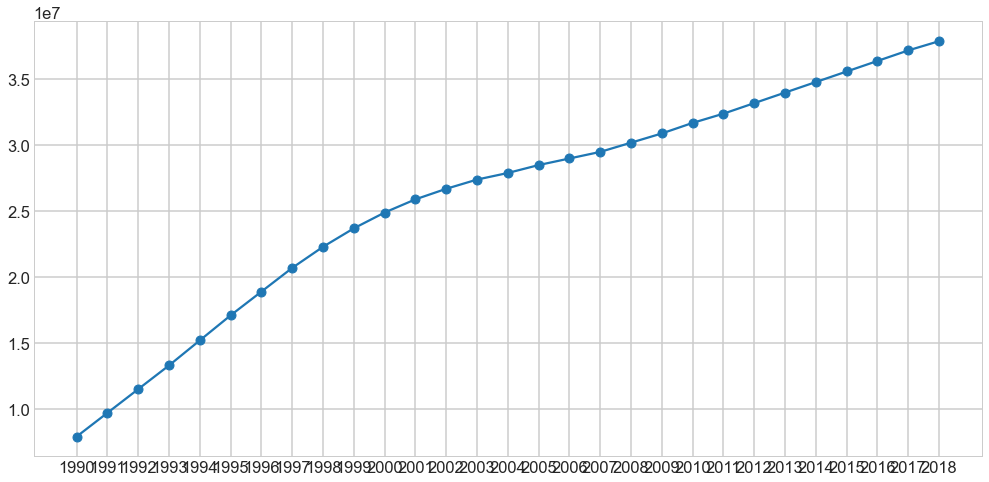

In [16]:
plt.figure(figsize=(17,8))
plt.plot(tmp0['year'],Estimate,'o-')